IT496 Introduction to Data Mining
---

**Group 03** Course Project 2

[Dataset](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

The given dataset contains the data of people classified as smoker/no-smoker and drinker/non-drinker along with their respective medical records.

For this project the aim is to classify the urine protein into 6 categories and predict it, given whether the person is smoker/non-smoker and drinker/non-drinker and other medical attributes.

**1. Loading the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.shape

(991346, 24)

In [4]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [5]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

**2. Exporatory Data Analysis(EDA)**

In [7]:
cat_columns=['sex','DRK_YN','hear_left','hear_right','urine_protein','SMK_stat_type_cd']
for column in cat_columns:
    print(f'{column}: {df[column].unique()}')

sex: ['Male' 'Female']
DRK_YN: ['Y' 'N']
hear_left: [1. 2.]
hear_right: [1. 2.]
urine_protein: [1. 3. 2. 4. 5. 6.]
SMK_stat_type_cd: [1. 3. 2.]


In [8]:
num_columns=[x for x in df.columns if x not in cat_columns]
num_columns

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP']

We will use the describe() function which provides basic statistics about the numeric attributes in the DataFrame. It includes metrics like count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [9]:
df[num_columns].describe()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,0.860467,25.989308,25.755051,37.136347
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.480530,23.493386,26.308599,50.424153
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,0.700000,19.000000,15.000000,16.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,0.800000,23.000000,20.000000,23.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,28.000000,29.000000,39.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,98.000000,9999.000000,7210.000000,999.000000


Box Plot displays the five-number summary of a set of data with the help of a box and a few verticle lines.



*   Minimum: Q1-1.5*IQR
*   1st quartile (Q1): 25th percentile
*   Median:50th percentile
*   3rd quartile(Q3):75th percentile
*   Maximum: Q3+1.5*IQR

IQR - Inter Quartile Range (region between 1st quartile and 3rd quartile\). 50% of the total data lies in this region.

The box plot also allows to discover the outliers, the points beyond the vertical lines, i.e. the points lying in Minimum and Maximum regions.


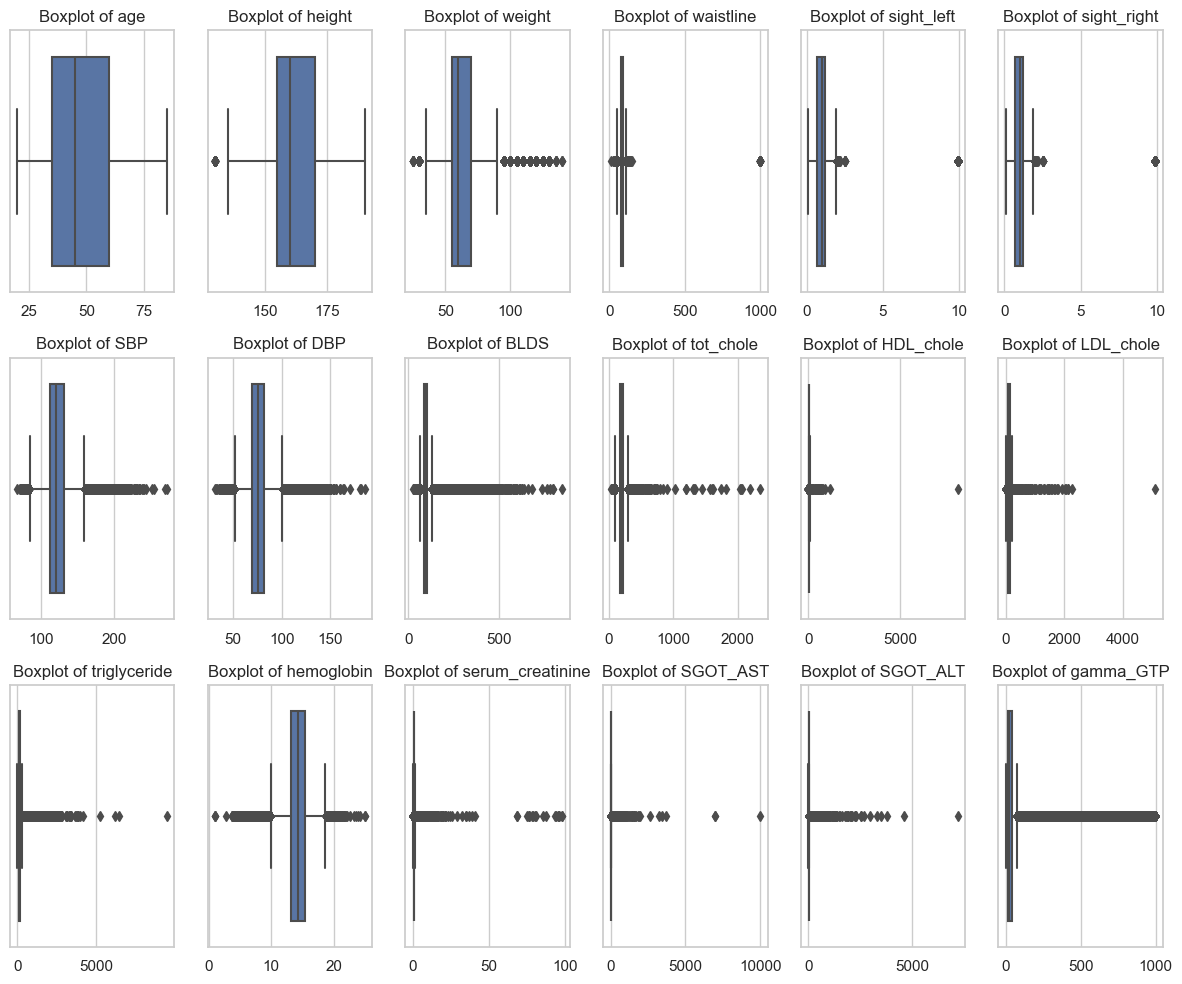

In [10]:
import math

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, math.ceil(len(num_columns)/3), figsize=(12, 10))

axes = axes.flatten()
for ax, col in zip(axes, num_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Removing the last 2 unused subplots
for i in range(len(num_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [11]:
for col in num_columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_count=0
    for val in df[col]:
        if val>upper_bound or val<lower_bound:
            outliers_count=outliers_count+1

    print(str(col)+' : '+str(outliers_count/len(df[col]))+'%')

age : 0.0%
height : 8.675074091185117e-05%
weight : 0.019388790593798735%
waistline : 0.004455558402414495%
sight_left : 0.01168310559582628%
sight_right : 0.010586616579882302%
SBP : 0.015974241082326455%
DBP : 0.013236549095875709%
BLDS : 0.06476245427933335%
tot_chole : 0.011396626404908074%
HDL_chole : 0.013978974041353877%
LDL_chole : 0.010186150950324106%
triglyceride : 0.05457630332900924%
hemoglobin : 0.00984520036394962%
serum_creatinine : 0.008074880011620565%
SGOT_AST : 0.06820423948853377%
SGOT_ALT : 0.07356462829324978%
gamma_GTP : 0.0949638168712034%


From the above box-plot analysis we can see that there are no major outliers in any numeric column. Hence we would be able to remove the outliers in the pre processing step without the need to drop any column.

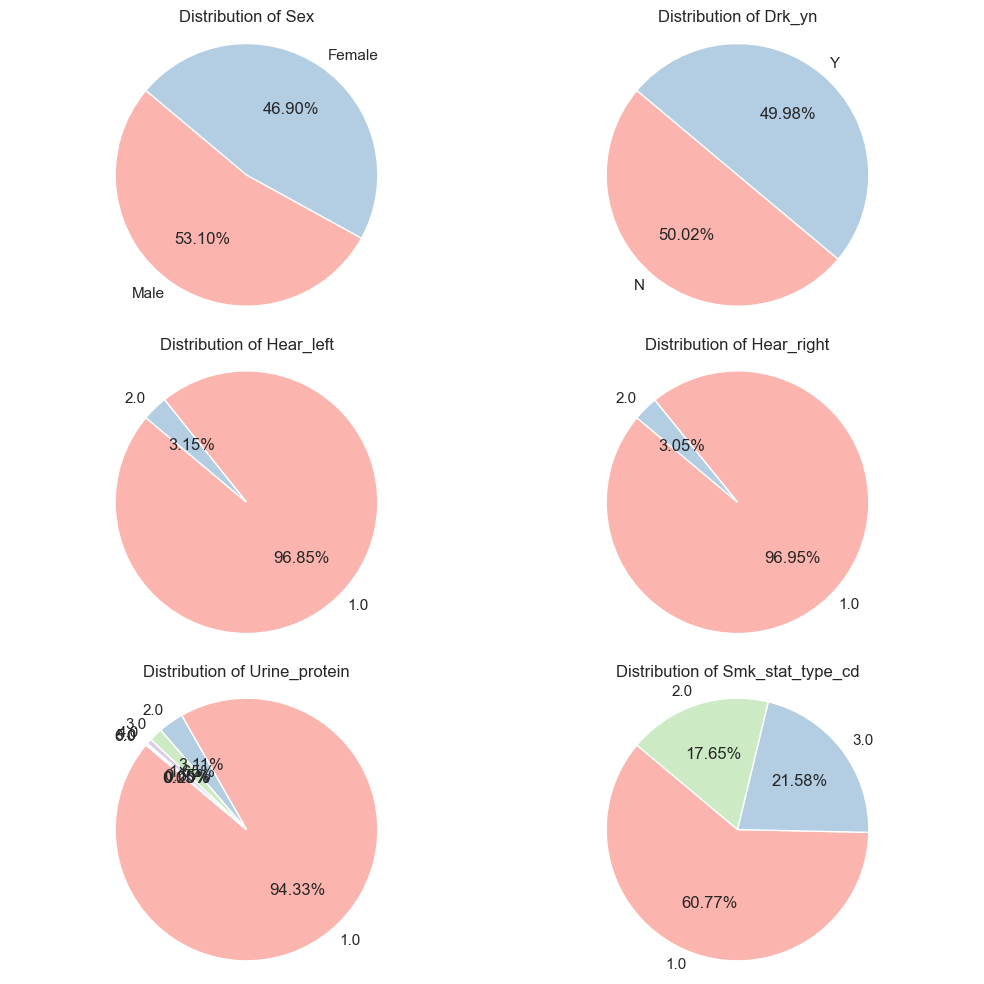

In [12]:
fig, axes = plt.subplots(math.ceil(len(cat_columns)/2), 2, figsize=(10, 10))
color_palette = sns.color_palette('Pastel1')

axes = axes.flatten()
for idx, feature in enumerate(cat_columns):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')

for i in range(len(cat_columns), math.ceil(len(cat_columns)/2) * 2):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

From the pie-chat we can observe that columns


1.   sex
2.   DRK_YN

are balanced. Whereas columns


1.   hear_left
2.   hear_right
3.   SMK_stat_type_cd

have unequal distribution. So while pre-processing we will have to impute the values for *urine_protein* column so that we can have better classification on balanced dataset.





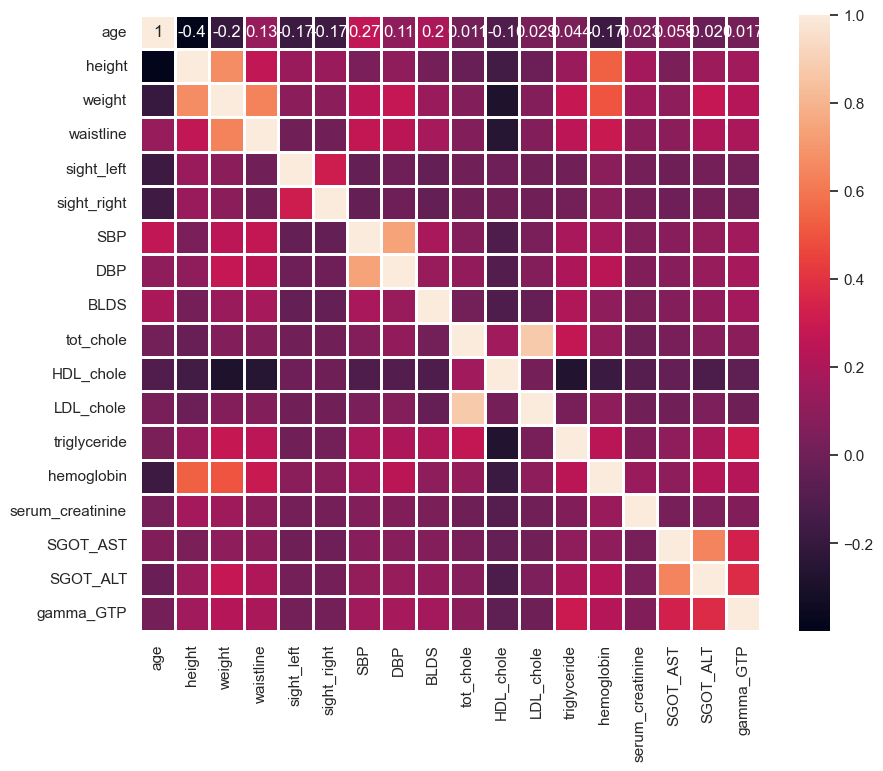

In [13]:
correlation_matrix = df[num_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=1)
plt.show()

From correlation matrix above we can identify certain columns to have a high degree of correlation, which can also be observed from the scatter-plots below.

<Axes: xlabel='SBP', ylabel='DBP'>

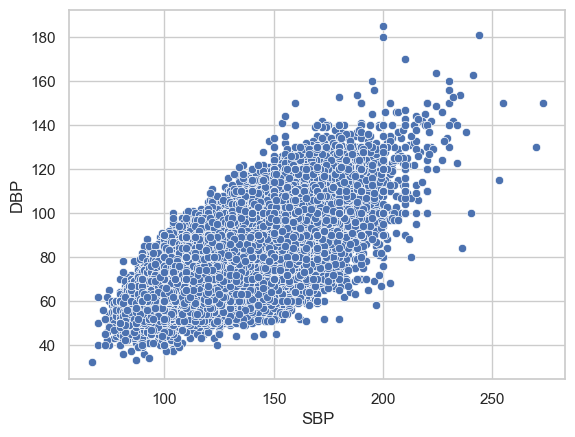

In [14]:
sns.scatterplot(x=df["SBP"], y=df["DBP"])

<Axes: xlabel='height', ylabel='weight'>

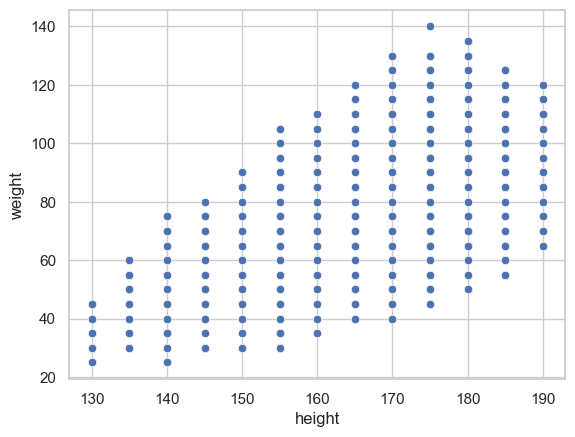

In [15]:
sns.scatterplot(x=df["height"], y=df["weight"])

<Axes: xlabel='waistline', ylabel='weight'>

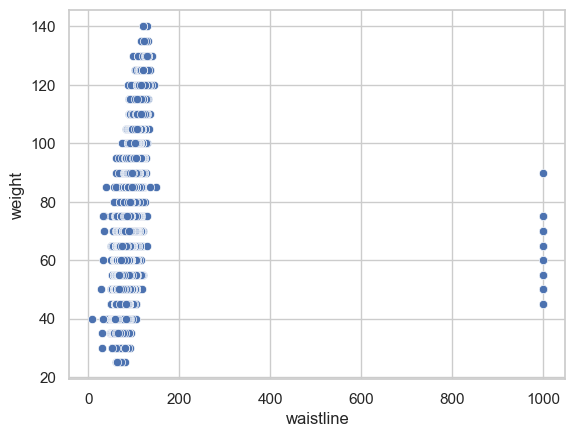

In [16]:
sns.scatterplot(x=df["waistline"], y=df["weight"])

<Axes: xlabel='tot_chole', ylabel='LDL_chole'>

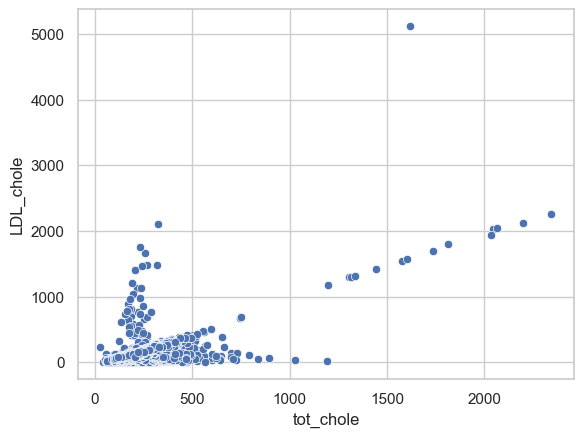

In [17]:
sns.scatterplot(x=df["tot_chole"], y=df["LDL_chole"])

<Axes: xlabel='height', ylabel='hemoglobin'>

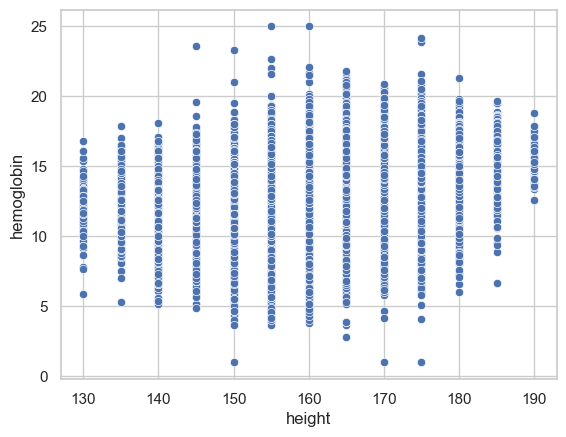

In [18]:
sns.scatterplot(x=df["height"], y=df["hemoglobin"])

<Axes: xlabel='weight', ylabel='hemoglobin'>

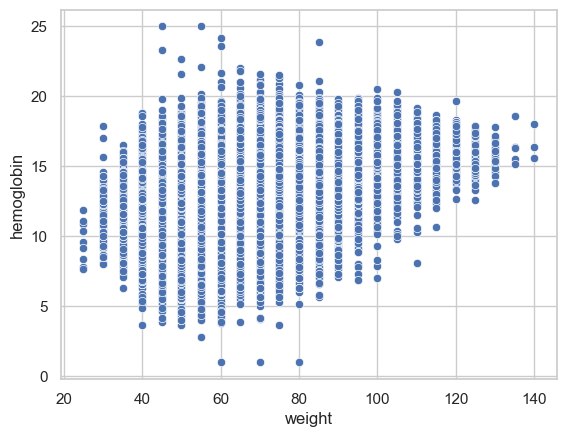

In [19]:
sns.scatterplot(x=df["weight"], y=df["hemoglobin"])

For the independent columns having high correlation we need to perform PCA or other similar processing to reduce the correlation among them.

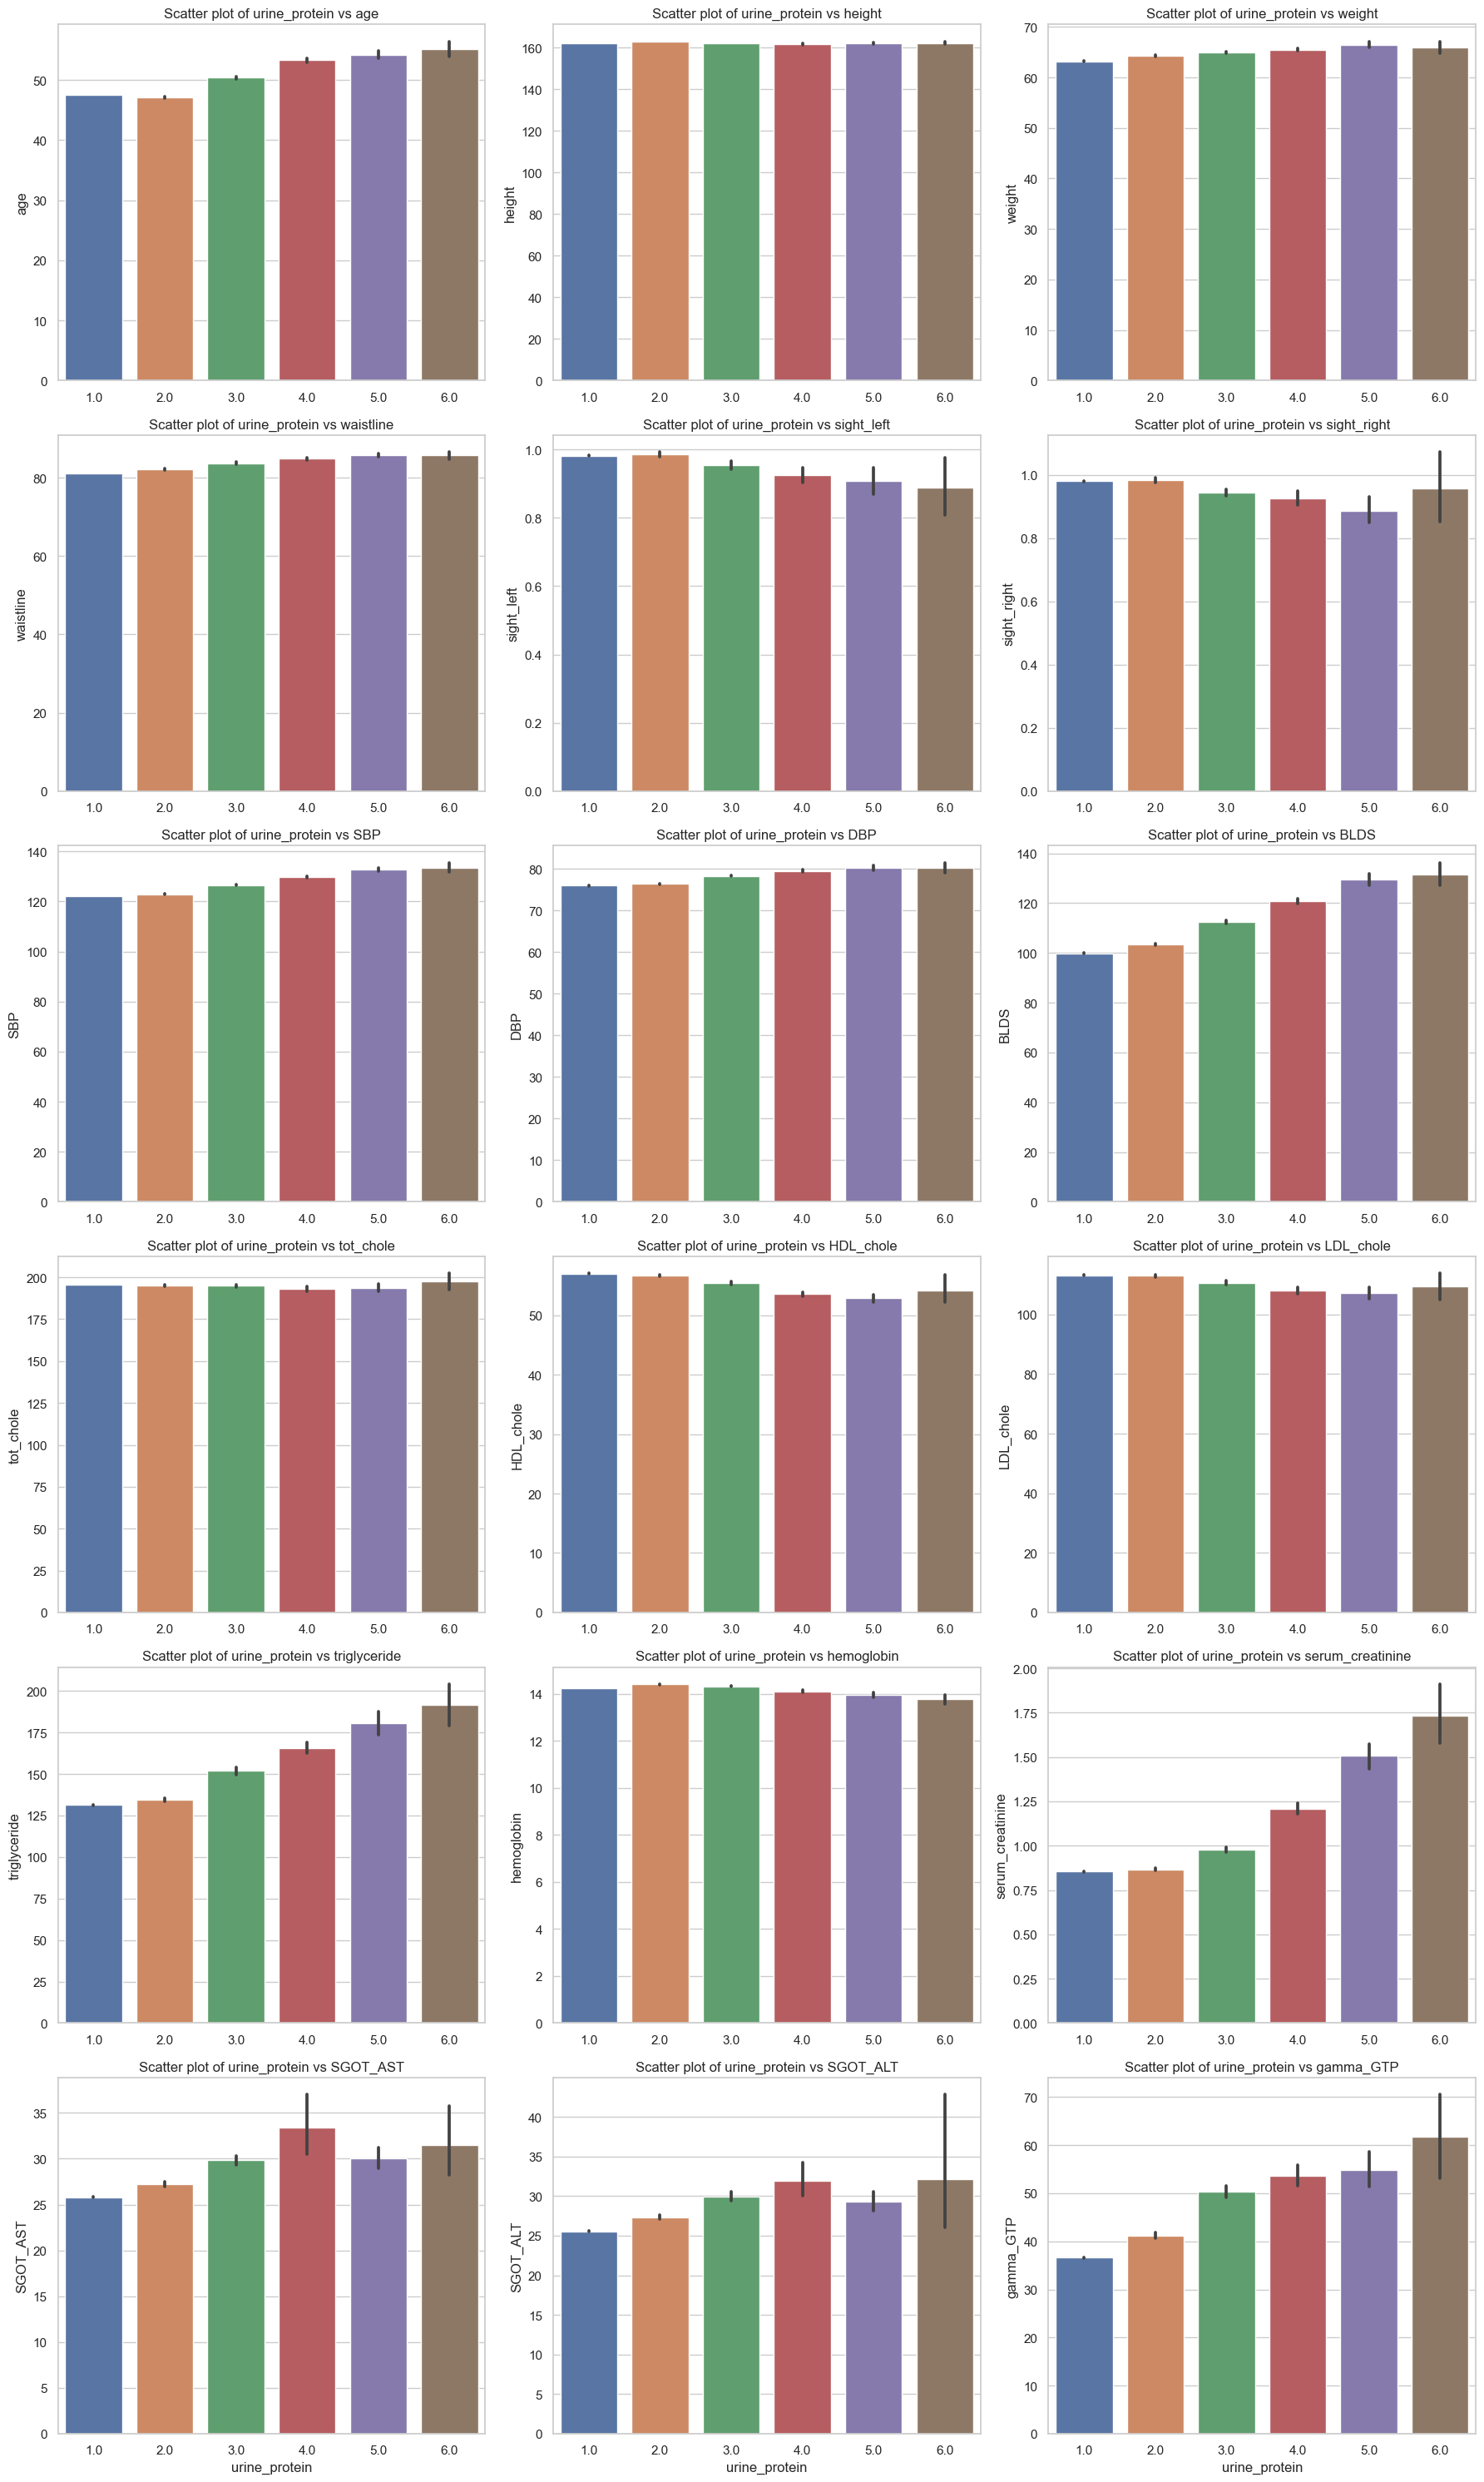

In [20]:
sns.set_theme(style="whitegrid")
x_column = "urine_protein"

num_plots = len(num_columns)

num_rows = (num_plots + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

axes = axes.flatten()

for i, num_col in enumerate(num_columns):
    sns.barplot(x=df[x_column], y=df[num_col], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {x_column} vs {num_col}')

    if i < (num_rows - 1) * 3:
        axes[i].set_xlabel('')

for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Numerical columns like


1.   age
2.   BLDS
3.   triglyceride
4.   serum_creatinine
5.   gamma_GPT

have strong relation with *urine_protein* and are important columns for model.



<Axes: xlabel='urine_protein', ylabel='count'>

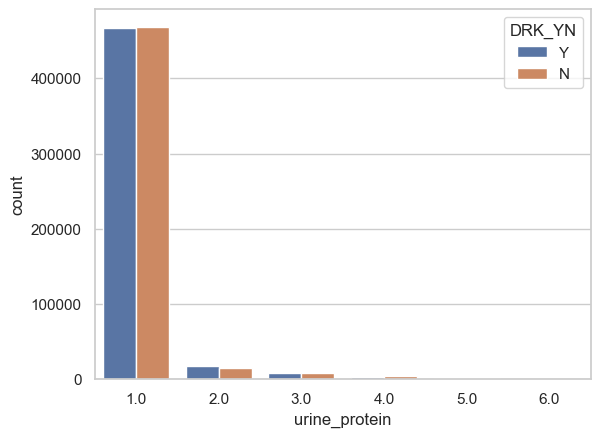

In [21]:
sns.countplot(data=df, x="urine_protein", hue="DRK_YN")

<Axes: xlabel='urine_protein', ylabel='count'>

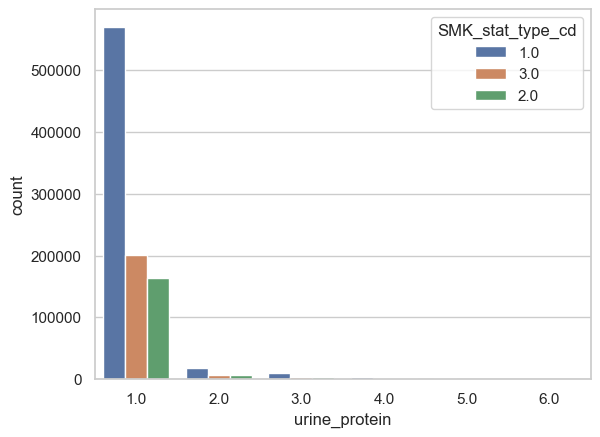

In [22]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].astype(str)
sns.countplot(data=df, x="urine_protein", hue="SMK_stat_type_cd")

From above count plot we can clearly witness that SMK_stat_type_cd type 1 have high probability of having lower protein class. Hence this column becomes important while training the model.

C:\Users\HP\AppData\Local\Temp\ipykernel_9152\1737281682.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
C:\Users\HP\AppData\Local\Temp\ipykernel_9152\1737281682.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
C:\Users\HP\AppData\Local\Temp\ipy

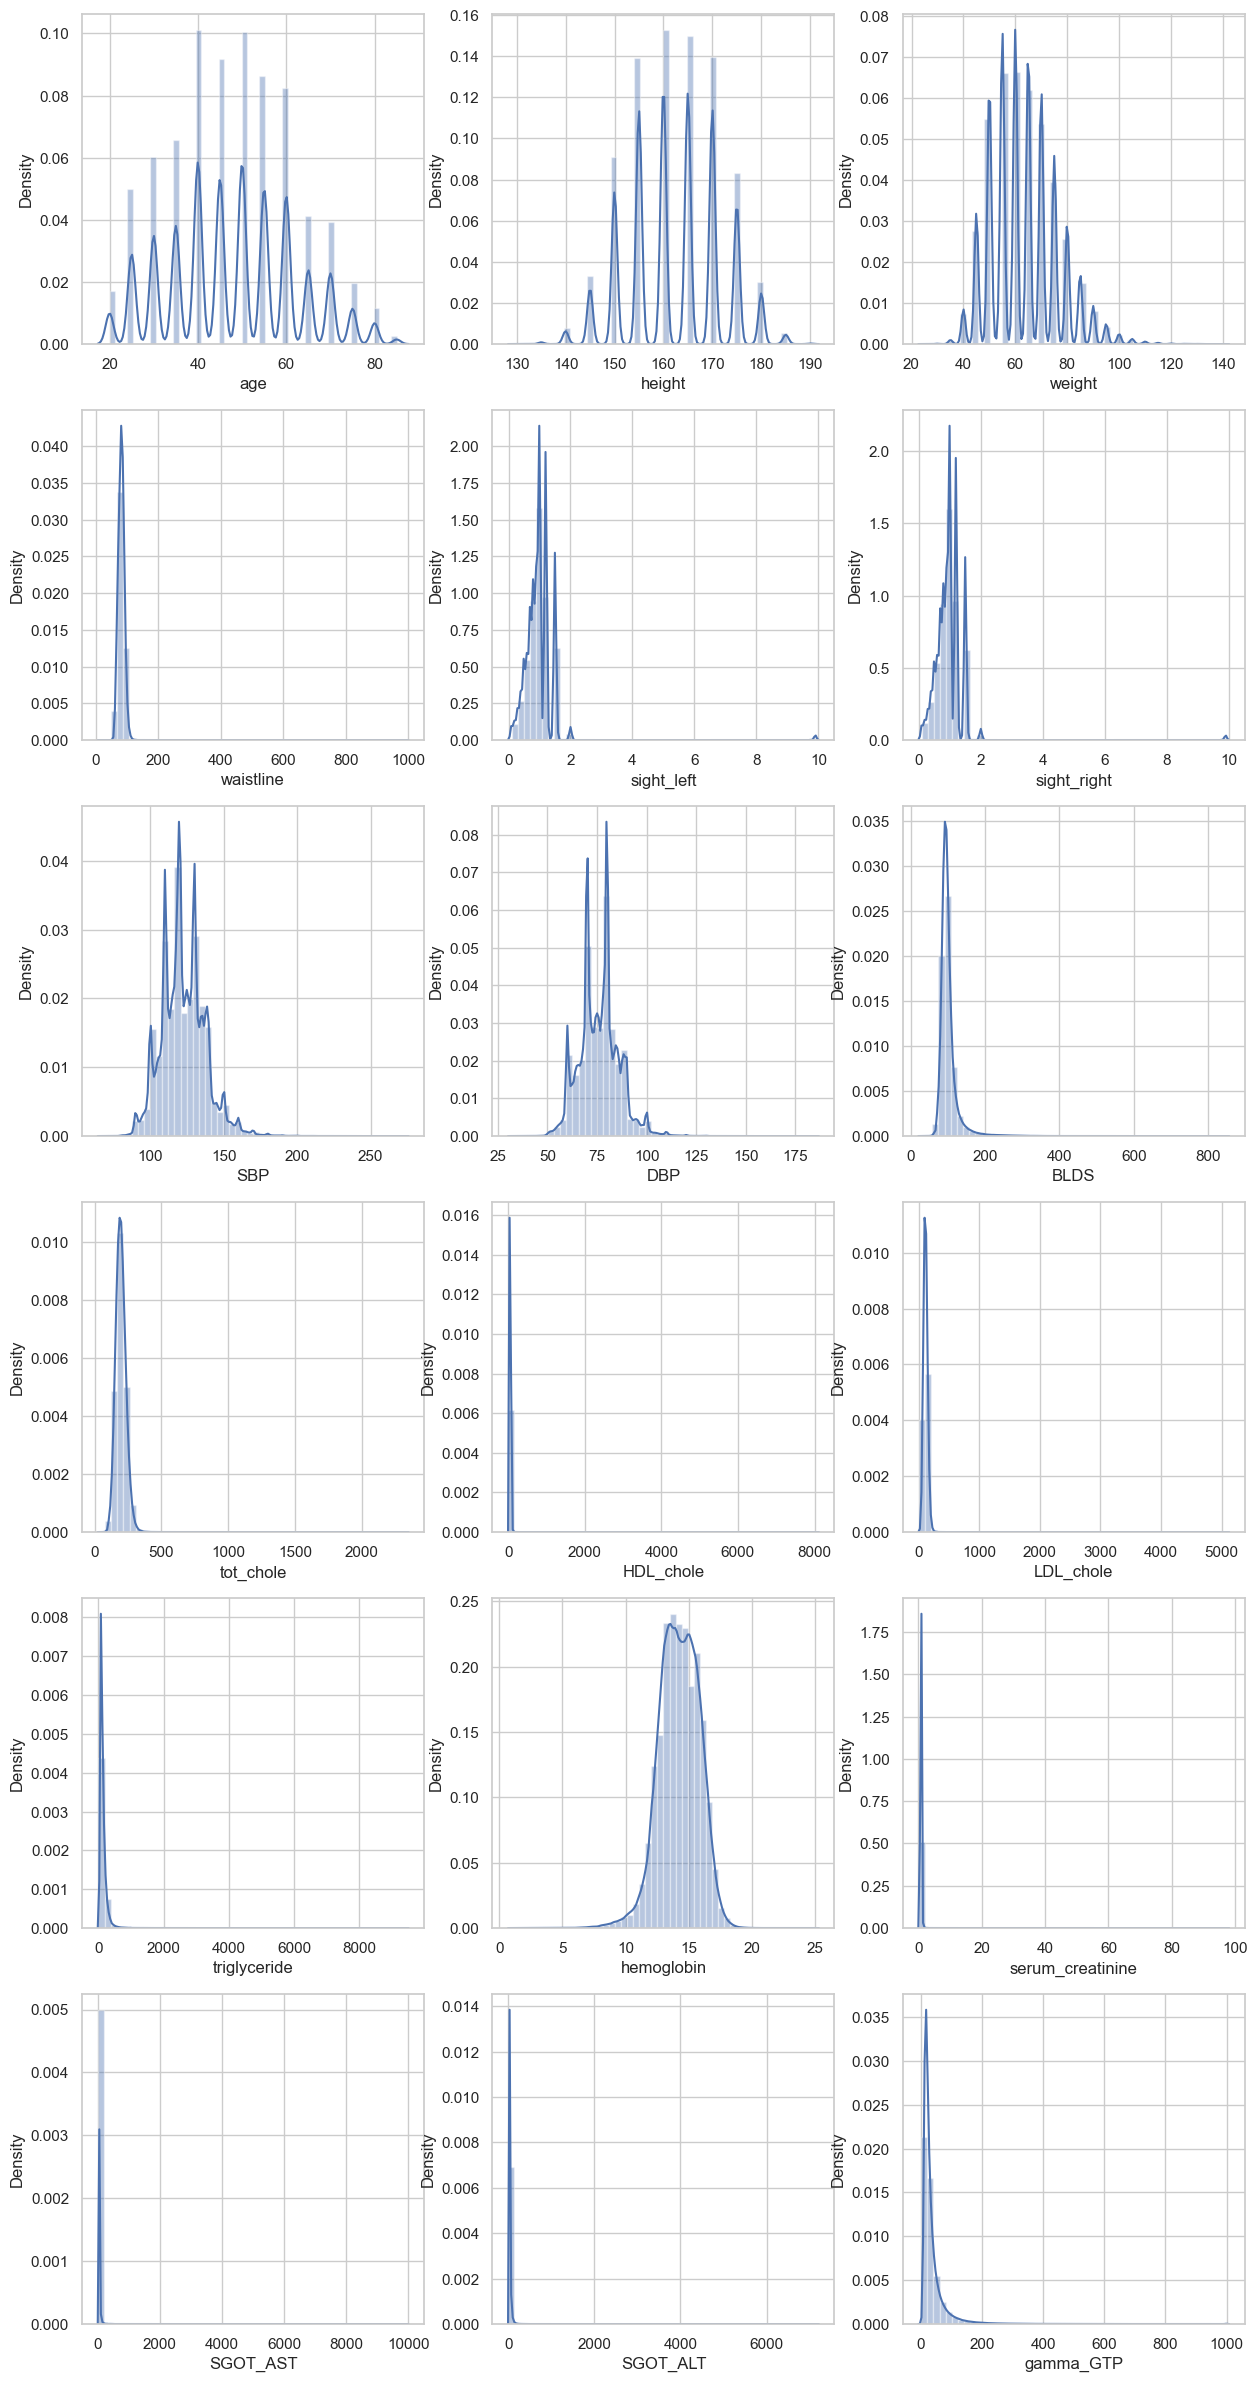

In [23]:
fig, ax = plt.subplots(math.ceil(len(num_columns)/3), 3, figsize=(15, 30))
ax=ax.ravel()

for axid, col in enumerate(num_columns):
    sns.distplot(df[col], ax=ax[axid])
    plt.title=col

for i in range(len(num_columns), len(ax)):
    fig.delaxes(ax[i])

In [24]:
print('Skewness for each numerical column')
for col in num_columns:
    print(col+' : '+str(df[col].skew()))

Skewness for each numerical column
age : 0.1536533871360202
height : -0.022737170425321796
weight : 0.5765565985058512
waistline : 26.78843978031659
sight_left : 9.994625971918909
sight_right : 10.033647020337831
SBP : 0.48206031829566537
DBP : 0.4000337997282636
BLDS : 4.6173774594196955
tot_chole : 1.5568817248099913
HDL_chole : 104.57763509143004
LDL_chole : 5.2517393773591285
triglyceride : 6.529372850852242
hemoglobin : -0.3839878001506678
serum_creatinine : 111.02205804336974
SGOT_AST : 150.49168971442893
SGOT_ALT : 50.038872293452705
gamma_GTP : 7.718509301560342


We can observe from the above distribution plots and by examining the data skewness that columns


1.   HDL_chole
2.   SGOT_AST
3.   SGOT_ALT
4.   waistline

have a high degree of skewness. The skewness will be dealt with by scaling the data.



In [25]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

There are no null values present in the dataset.

**3. Pre-Processing**

The outliers detected during EDA needs to be removed.

In [26]:
def remove_outliers_iqr(dataframe, columns, lower_bound_factor=1.5, upper_bound_factor=1.5):

    trimmed_dataframe = dataframe.copy()

    for column in columns:
        Q1 = trimmed_dataframe[column].quantile(0.25)
        Q3 = trimmed_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - lower_bound_factor * IQR
        upper_bound = Q3 + upper_bound_factor * IQR

        trimmed_dataframe = trimmed_dataframe[(trimmed_dataframe[column] >= lower_bound) & (trimmed_dataframe[column] <= upper_bound)]

    return trimmed_dataframe

df_new = remove_outliers_iqr(df, num_columns)

In [27]:
df_new.shape

(631060, 24)

**4. Data Transformation**

Ctaegorical columns except *urine_protein* and *SMK_stat_type_cd* are binary classes so we can directly apply label encoding. For the column *SMK_stat_type_cd* we do not find any internal order among the column values and for column *urine_protein* have only 6 classes so we can use label encoding for all columns.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder=LabelEncoder()

In [30]:
mapping = {}

for column in cat_columns:
    df_new[column] = encoder.fit_transform(df_new[column])
    mapping[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [31]:
for column_name in cat_columns:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()


Mapping for column "sex":
Female: 0
Male: 1

Mapping for column "DRK_YN":
N: 0
Y: 1

Mapping for column "hear_left":
1.0: 0
2.0: 1

Mapping for column "hear_right":
1.0: 0
2.0: 1

Mapping for column "urine_protein":
1.0: 0
2.0: 1
3.0: 2
4.0: 3
5.0: 4
6.0: 5

Mapping for column "SMK_stat_type_cd":
1.0: 0
2.0: 1
3.0: 2



In [32]:
df_new.sample(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
569480,0,55,150,60,78.0,1.0,0.8,0,0,148.0,80.0,86.0,159.0,70.0,53.0,178.0,13.9,0,0.8,26.0,30.0,28.0,0,0
887114,0,70,150,65,91.0,0.9,0.9,0,0,125.0,71.0,128.0,148.0,55.0,71.0,106.0,13.4,0,0.7,21.0,21.0,16.0,0,0
357276,1,45,180,70,86.3,0.8,0.4,0,0,114.0,63.0,111.0,224.0,47.0,155.0,110.0,13.5,0,0.9,24.0,20.0,17.0,2,1
277570,0,45,150,50,69.0,1.5,1.2,0,0,120.0,70.0,83.0,182.0,67.0,100.0,74.0,13.7,0,0.7,16.0,12.0,15.0,0,0
461213,1,60,160,70,92.0,1.2,1.0,1,0,120.0,80.0,83.0,227.0,58.0,150.0,95.0,14.0,0,0.9,25.0,17.0,39.0,1,0
60641,1,60,160,70,87.0,1.0,1.5,0,0,131.0,82.0,82.0,167.0,49.0,82.0,177.0,13.6,0,1.0,34.0,38.0,35.0,1,0
681084,1,40,165,65,85.5,0.9,0.9,0,0,132.0,84.0,99.0,183.0,61.0,99.0,114.0,17.5,0,0.8,24.0,27.0,39.0,0,1
349834,0,45,155,60,80.0,1.0,1.0,0,0,102.0,58.0,88.0,178.0,57.0,110.0,56.0,13.4,0,0.6,21.0,17.0,16.0,0,1
950414,0,50,155,50,68.0,0.2,0.3,0,0,120.0,80.0,75.0,197.0,83.0,107.0,33.0,12.7,0,0.9,18.0,17.0,11.0,0,0
848480,0,70,150,50,89.0,0.9,0.7,0,0,138.0,64.0,73.0,145.0,64.0,65.0,79.0,13.2,0,0.6,25.0,15.0,14.0,0,0


As observed from the pie-chat for *urine_protein* that the dataset is unbalanced, so now we use ramdom oversampling to impute the data to balanced the dataset.

Axes(0.125,0.11;0.775x0.77)


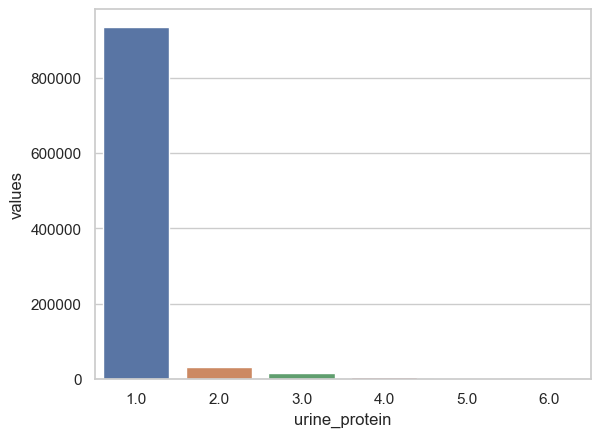

In [33]:
t = df["urine_protein"].value_counts()
t_data = pd.DataFrame({'urine_protein':t.index,'values':t.values})
print(sns.barplot(x='urine_protein',y="values",data=t_data))

In [34]:
X=df_new.drop('urine_protein',axis='columns')
y=df_new['urine_protein']

In [35]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
r = RandomOverSampler()
Xs, ys = r.fit_resample(X, y)
print(Counter(ys))
Xs.shape

Counter({0: 602556, 2: 602556, 1: 602556, 3: 602556, 4: 602556, 5: 602556})


(3615336, 23)

In [36]:
print(Xs.shape)
print(ys.shape)

(3615336, 23)
(3615336,)


Axes(0.125,0.11;0.775x0.77)


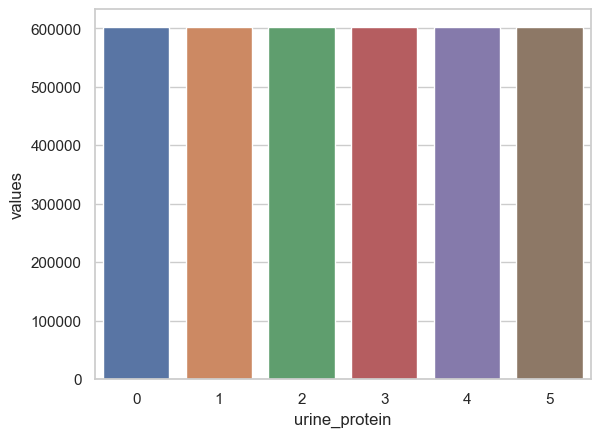

In [37]:
t = ys.value_counts()
t_data = pd.DataFrame({'urine_protein':t.index,'values':t.values})
print(sns.barplot(x='urine_protein',y="values",data=t_data))

**5. Model Training and Testing**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test_tmp, y_train, y_test_tmp = train_test_split(Xs, ys, test_size = 0.2, random_state = 42,shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test_tmp, y_test_tmp, test_size = 0.5, random_state = 42,shuffle=True)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(2892268, 23)
(2892268,)
(361534, 23)
(361534,)
(361534, 23)
(361534,)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
X_train_scaled.shape, X_test_scaled.shape, X_val_scaled.shape

((2892268, 23), (361534, 23), (361534, 23))

In [41]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
# model_dict = {
#     'Logistic Regression': {"model": LogisticRegression(), "params": {'penalty':['None','l1','l2'],'solver':['newton-cg','newton-cholesky']}},
#     'KNN': {"model": KNeighborsClassifier(), "params": {'n_neighbors':list(range(5, 11, 2)),'weights':['distance']}},
#     'RandomForestClassifier': {"model": RandomForestClassifier(random_state=42),
#                      "params": {'n_estimators': list(range(5, 15, 5)), 'max_depth': list(range(1, 10, 2))}},
#     'SVC': {"model": SVC(),
#                      "params": {'kernel':['poly','rbf'], 'degree': list(range(1, 5, 1))}},
# }

In [43]:
# def eval_models():
#     model_results = pd.DataFrame()
#     model_results['Train_Recall'] = None
#     model_results['Test_Recall'] = None
#     model_results['Train_Precision'] = None
#     model_results['Test_Precision'] = None
#     model_results['Train_F1'] = None
#     model_results['Test_F1'] = None
#     model_results['best_params'] = None

#     best_class_model_ours = None
#     best_test_score = math.inf

#     for model_name, reg_model in model_dict.items():
#         classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
#         classifier.fit(X_train_scaled, list(y_train))
#         best_model = classifier.best_estimator_

#         y_train_predicted = best_model.predict(X_train_scaled)
#         train_recall = recall_score(list(y_train), y_train_predicted,average='micro')
#         train_precision = precision_score(list(y_train), y_train_predicted,average='micro')
#         train_f1 = f1_score(list(y_train), y_train_predicted,average='micro')

#         print(model_name, train_f1, classifier.best_params_)

#         y_predicted = best_model.predict(X_test_scaled)
#         test_recall = recall_score(list(y_test), y_predicted,average='micro')
#         test_precision = precision_score(list(y_test), y_predicted,average='micro')
#         test_f1 = f1_score(list(y_test), y_predicted,average='micro')

#         if test_f1 > best_test_score:
#             best_test_score = test_f1
#             best_reg_model_ours = best_model

#         model_results.loc[model_name, ['Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1', 'best_params']] = [train_recall, test_recall, train_precision, test_precision, train_f1, test_f1, classifier.best_params_]

#     print("Best model: ", best_reg_model_ours)
#     # plot the prediction errors using the best model
#     y_predicted = best_reg_model_ours.predict(X_test_scaled)
#     plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

#     return model_results

In [44]:
# model_results = eval_models()

In [45]:
model_results = pd.DataFrame()
model_results['Train_Recall'] = None
model_results['Val_Recall'] = None
model_results['Train_Precision'] = None
model_results['Val_Precision'] = None
model_results['Train_F1'] = None
model_results['Val_F1'] = None
model_results['Train_Accuracy'] = None
model_results['Val_Accuracy'] = None

best_class_model_ours = None
best_val_score = -1

In [46]:
classifier = LogisticRegression(solver='newton-cholesky')
classifier.fit(X_train_scaled, list(y_train))

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(list(y_train), y_train_predicted,average='micro')
train_precision = precision_score(list(y_train), y_train_predicted,average='micro')
train_f1 = f1_score(list(y_train), y_train_predicted,average='micro')
train_accuracy=accuracy_score(list(y_train), y_train_predicted)

print('Logistic Regression', train_precision)

y_predicted = classifier.predict(X_val_scaled)
val_recall = recall_score(list(y_val), y_predicted,average='micro')
val_precision = precision_score(list(y_val), y_predicted,average='micro')
val_f1 = f1_score(list(y_val), y_predicted,average='micro')
val_accuracy=accuracy_score(list(y_val), y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['Logistic Regression', ['Train_Accuracy','Val_Accuracy','Train_Recall', 'Val_Recall', 'Train_Precision', 'Val_Precision', 'Train_F1', 'Val_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

Logistic Regression 0.23686947405980358


In [47]:
classifier = RandomForestClassifier(random_state=42,n_estimators=10)
classifier.fit(X_train_scaled, list(y_train))

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(list(y_train), y_train_predicted,average='micro')
train_precision = precision_score(list(y_train), y_train_predicted,average='micro')
train_f1 = f1_score(list(y_train), y_train_predicted,average='micro')
train_accuracy=accuracy_score(list(y_train), y_train_predicted)

print('Random Forest', train_precision)

y_predicted = classifier.predict(X_val_scaled)
val_recall = recall_score(list(y_val), y_predicted,average='micro')
val_precision = precision_score(list(y_val), y_predicted,average='micro')
val_f1 = f1_score(list(y_val), y_predicted,average='micro')
val_accuracy=accuracy_score(list(y_val), y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['Random Forest', ['Train_Accuracy','Val_Accuracy','Train_Recall', 'Val_Recall', 'Train_Precision', 'Val_Precision', 'Train_F1', 'Val_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

Random Forest 1.0


In [48]:
import xgboost as xgb

In [49]:
classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=6)
classifier.fit(X_train_scaled, list(y_train))

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(list(y_train), y_train_predicted,average='micro')
train_precision = precision_score(list(y_train), y_train_predicted,average='micro')
train_f1 = f1_score(list(y_train), y_train_predicted,average='micro')
train_accuracy=accuracy_score(list(y_train), y_train_predicted)

print('XGBoost', train_precision)

y_predicted = classifier.predict(X_val_scaled)
val_recall = recall_score(list(y_val), y_predicted,average='micro')
val_precision = precision_score(list(y_val), y_predicted,average='micro')
val_f1 = f1_score(list(y_val), y_predicted,average='micro')
val_accuracy=accuracy_score(list(y_val), y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['XGBoost', ['Train_Accuracy','Val_Accuracy','Train_Recall', 'Val_Recall', 'Train_Precision', 'Val_Precision', 'Train_F1', 'Val_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

XGBoost 0.7638375835157738


In [50]:
from tensorflow import keras
import keras.layers as tfl

In [53]:
inputs=tfl.Input(shape=(23,))
x=tfl.Dense(64,activation='relu')(inputs)
x=tfl.Dense(32,activation='relu')(x)
x=tfl.Dense(16,activation='relu')(x)
outputs=tfl.Dense(6,activation='sigmoid')(x)
classifier=keras.Model(inputs,outputs)

classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

classifier.fit(X_train_scaled, y_train,epochs=10)

Epoch 1/10
90384/90384 [==============================] - 152s 2ms/step - loss: 0.9963 - accuracy: 0.5371
Epoch 2/10
90384/90384 [==============================] - 156s 2ms/step - loss: 0.9081 - accuracy: 0.5689
Epoch 3/10
90384/90384 [==============================] - 148s 2ms/step - loss: 0.8817 - accuracy: 0.5835
Epoch 4/10
90384/90384 [==============================] - 149s 2ms/step - loss: 0.8617 - accuracy: 0.5940
Epoch 5/10
90384/90384 [==============================] - 151s 2ms/step - loss: 0.8463 - accuracy: 0.6009
Epoch 6/10
90384/90384 [==============================] - 152s 2ms/step - loss: 0.8346 - accuracy: 0.6069
Epoch 7/10
90384/90384 [==============================] - 164s 2ms/step - loss: 0.8272 - accuracy: 0.6103
Epoch 8/10
90384/90384 [==============================] - 150s 2ms/step - loss: 0.8204 - accuracy: 0.6133
Epoch 9/10
90384/90384 [==============================] - 150s 2ms/step - loss: 0.8151 - accuracy: 0.6152
Epoch 10/10
90384/90384 [=====================

In [56]:
model_results

,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_F1,Val_F1,Train_Accuracy,Val_Accuracy
Logistic Regression,0.236869,0.237292,0.236869,0.237292,0.236869,0.237292,0.236869,0.237292
Random Forest,1.0,0.999994,1.0,0.999994,1.0,0.999994,1.0,0.999994
XGBoost,0.763838,0.759162,0.763838,0.759162,0.763838,0.759162,0.763838,0.759162


In [57]:
y_pred=best_class_model_ours.predict(X_test_scaled)
print('Best Model is '+str(best_class_model_ours)+' on test set : ')
print('Accuracy : '+str(accuracy_score(y_pred,list(y_test))))
print('Recall : '+str(recall_score(y_pred,list(y_test),average='macro')))
print('Precision : '+str(precision_score(y_pred,list(y_test),average='macro')))
print('F1 : '+str(f1_score(y_pred,list(y_test),average='macro')))

Best Model is RandomForestClassifier(n_estimators=10, random_state=42) on test set : 
Accuracy : 0.9999889360336787
Recall : 0.9999889142135404
Precision : 0.9999889143858015
F1 : 0.9999889140002519
